# Coupled Model

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [9]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)
from IPython.display import Latex

In [10]:
import os
import matplotlib.pyplot as plt

In [11]:
from src.configs.load_config import load_config

In [12]:
from src.models.model_setup import ModelSetup
from src.constants import TEST_DIREC

In [13]:
cfg = load_config(test=False)
setup = ModelSetup(str(TEST_DIREC))

In [20]:
from src.models.ocean import Ocean
from src.models.atmos import Atmos
from src.models.coupling import Coupling

[autoreload of src.models.atmos failed: Traceback (most recent call last):
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 266, in up

In [15]:
os.listdir(setup.ocean_data_path)

['dQdf-sample.nc',
 'dQdT-sample.nc',
 'om_mask.nc',
 'qflx-0.nc',
 'qflx.nc',
 'qflx-test.nc',
 'rzk.pro',
 'spline_ECMWF.txt',
 'sst-ECMWF-clim.nc',
 'tau-ECMWF-clim.x',
 'tau-ECMWF-clim.y',
 'tau-ECMWF.x',
 'tau-ECMWF.y']

In [16]:
os.listdir(setup.ocean_output_path)

['om_diag.nc',
 'om_test.save',
 'om_spin.save',
 'om_spin.nc',
 'om_spin.20y.restart',
 'om_diag.save',
 'om_diag.2y.restart',
 'om_run2f.save',
 'om_run2f.nc']

. For coupling, the drag coefficient, cD—used to convert modelled winds into stresses to force the ocean component—is 2.25 × 10−3, which is about 50% larger than typical values, but was found necessary for a coupled response with approximately the observed amplitude.

In [17]:
os.listdir(setup.atmos_path)

['DATA',
 'tmp',
 'prTrend.png',
 'S90-H2000-Stab.eps',
 'S91-hq1800-prcp_land1.nc',
 'Q.nc',
 'dQ.nc',
 'Tsp4.eps']

In [18]:
os.listdir(setup.atmos_data_path)

['clt-ECMWF-clim60.nc',
 'mask-360x180.nc',
 'mask-360x181.nc',
 'pr-ECMWF-clim.nc',
 'pr-ECMWF-trend.nc',
 'ps-ECMWF-clim.nc',
 'rh-ECMWF-clim60.nc',
 'rh-fixed-clim60.nc',
 'sfcWind-ECMWF-clim60.nc',
 'sfcWind-ECMWF-clim.nc',
 'sst-ECMWF-clim.nc',
 'sst-ECMWF-trend.nc',
 'ts-ECMWF-clim60.nc',
 'ts-ECMWF-clim.nc',
 'ts-ECMWF-trend.nc']

editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_spin
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_diag
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_run2f
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_test 2.05038 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_spin -t om_spin.tios 369.81722 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tios2cdf -f output/om_spin 3.52922 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
rm -rf output/om_spin.data output/om_spin.indx 0.09400 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
cp -f output/om_spin.save output/om_spin.20y.restart 0.03741 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_diag -t om_diag.tios 56.40740 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tios2cdf -f output/om_diag 0.

/home/users/sithom/seager19/src/test/test_direc/om_diag_SST_SST.gif:   0%|          | 0/24 [00:00<?, ?it/s]

0
1
2
3
4
SST_SST


/home/users/sithom/seager19/src/test/test_direc/om_diag_SST_SST.gif: 100%|██████████| 24/24 [00:06<00:00,  3.69it/s]
/home/users/sithom/seager19/src/test/test_direc/om_diag_SST_QFLX.gif:   0%|          | 0/24 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_diag_SST_SST.gif made.
'animate_xr_da'  8.90541 s 

SST_QFLX


/home/users/sithom/seager19/src/test/test_direc/om_diag_SST_QFLX.gif: 100%|██████████| 24/24 [00:06<00:00,  3.83it/s]
/home/users/sithom/seager19/src/test/test_direc/om_diag_DYN_PRES.gif:   0%|          | 0/24 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_diag_SST_QFLX.gif made.
'animate_xr_da'  8.90831 s 

DYN_PRES


/home/users/sithom/seager19/src/test/test_direc/om_diag_DYN_PRES.gif: 100%|██████████| 24/24 [00:06<00:00,  3.68it/s]
/home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_HMODEL.gif:   0%|          | 0/24 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_diag_DYN_PRES.gif made.
'animate_xr_da'  9.54524 s 

TDEEP_HMODEL


/home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_HMODEL.gif: 100%|██████████| 24/24 [00:06<00:00,  3.76it/s]
/home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_TDEEP.gif:   0%|          | 0/24 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_HMODEL.gif made.
'animate_xr_da'  8.98703 s 

TDEEP_TDEEP


/home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_TDEEP.gif: 100%|██████████| 24/24 [00:06<00:00,  3.58it/s]
/home/users/sithom/seager19/src/test/test_direc/om_run2f_DYN_PRES.gif:   0%|          | 0/25 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_TDEEP.gif made.
'animate_xr_da'  9.22830 s 

'animate_ds'  45.77505 s 

DYN_PRES


/home/users/sithom/seager19/src/test/test_direc/om_run2f_DYN_PRES.gif: 100%|██████████| 25/25 [00:07<00:00,  3.50it/s]
/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HTHERM.gif:   0%|          | 0/25 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_run2f_DYN_PRES.gif made.
'animate_xr_da'  10.35865 s 

TDEEP_HTHERM


/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HTHERM.gif: 100%|██████████| 25/25 [00:06<00:00,  3.84it/s]
/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_TDEEP.gif:   0%|          | 0/25 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HTHERM.gif made.
'animate_xr_da'  9.12712 s 

TDEEP_TDEEP


/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_TDEEP.gif: 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]
/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HMODEL.gif:   0%|          | 0/25 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_TDEEP.gif made.
'animate_xr_da'  10.14934 s 

TDEEP_HMODEL


/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HMODEL.gif: 100%|██████████| 25/25 [00:06<00:00,  3.85it/s]
/home/users/sithom/seager19/src/test/test_direc/om_run2f_SST_SST.gif:   0%|          | 0/25 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HMODEL.gif made.
'animate_xr_da'  9.13950 s 

SST_SST


/home/users/sithom/seager19/src/test/test_direc/om_run2f_SST_SST.gif: 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]
/home/users/sithom/seager19/src/test/test_direc/qflx-diff.gif:   0%|          | 0/12 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_run2f_SST_SST.gif made.
'animate_xr_da'  10.36424 s 

'animate_ds'  49.34844 s 



/home/users/sithom/seager19/src/test/test_direc/qflx-diff.gif: 100%|██████████| 12/12 [00:06<00:00,  1.89it/s]


Video /home/users/sithom/seager19/src/test/test_direc/qflx-diff.gif made.
'animate_qflx_diff'  11.23422 s 

'animate_all'  01 min 46 s 



<Figure size 826.772x510.973 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

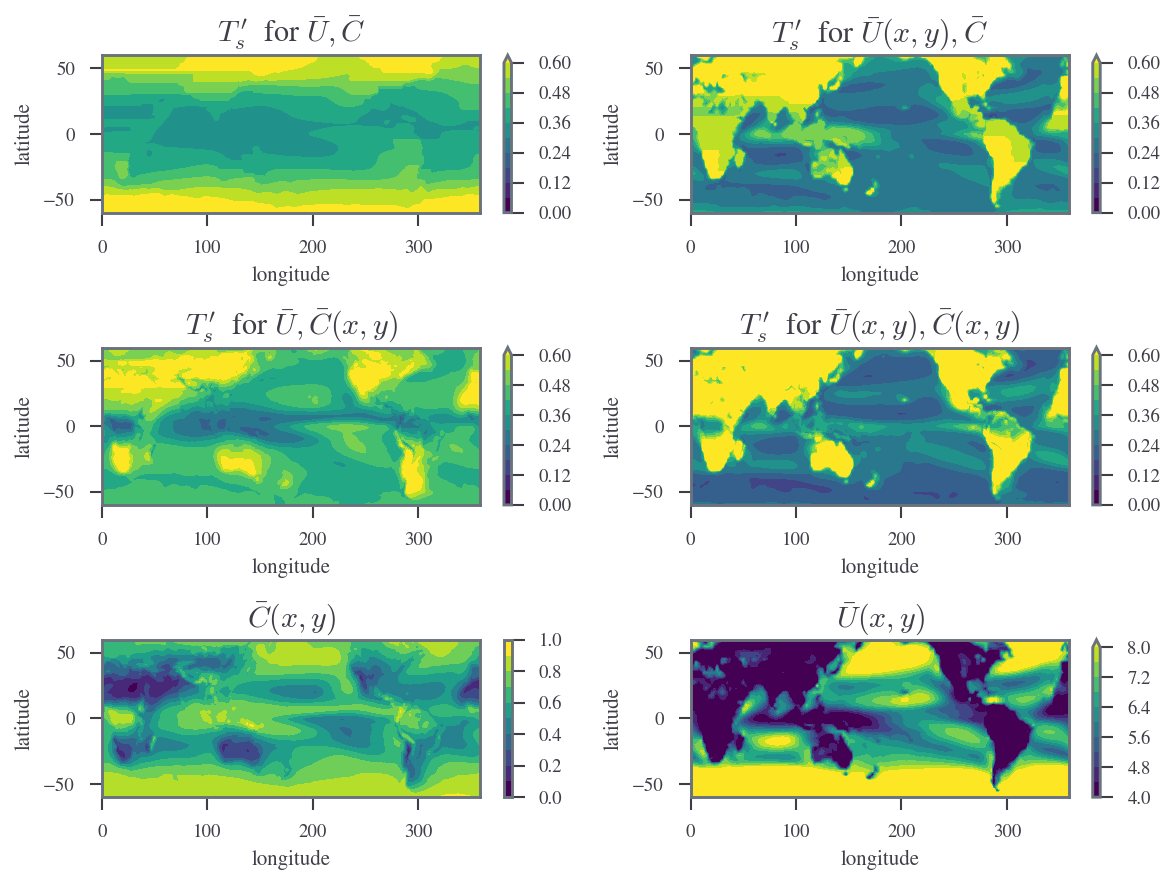

In [21]:
coup = Coupling(cfg, setup)
coup.run()

In [64]:
import os
import xarray as xr
from src.xr_utils import open_dataset, open_dataarray, sel, can_coords
from src.plot_utils import add_units

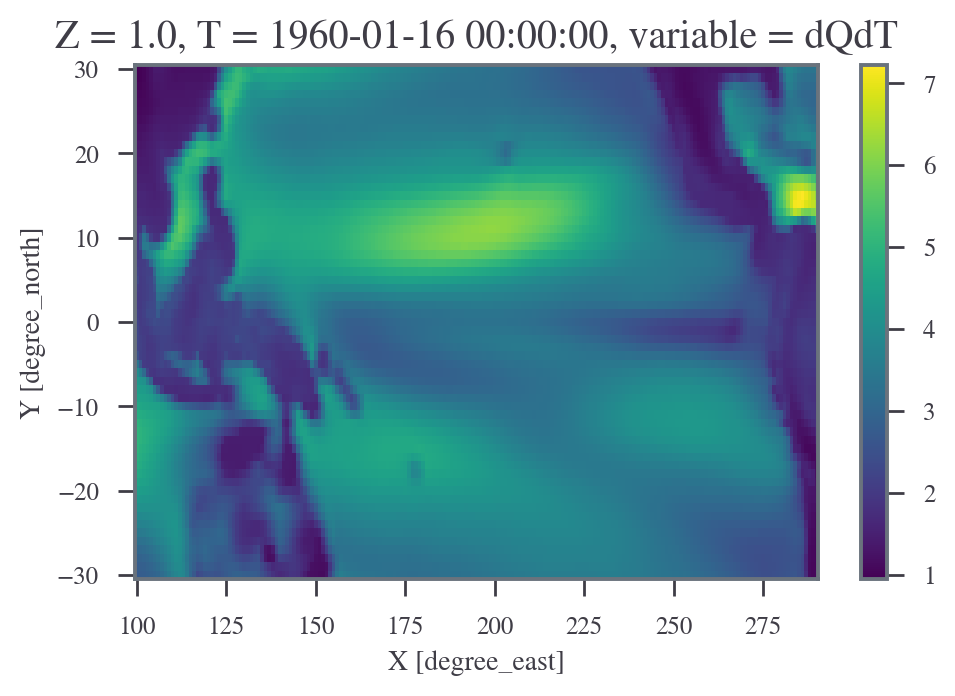

In [34]:
sel(open_dataarray(os.path.join(setup.ocean_data_path, "dQdT-sample.nc"))).isel(T=0).plot()

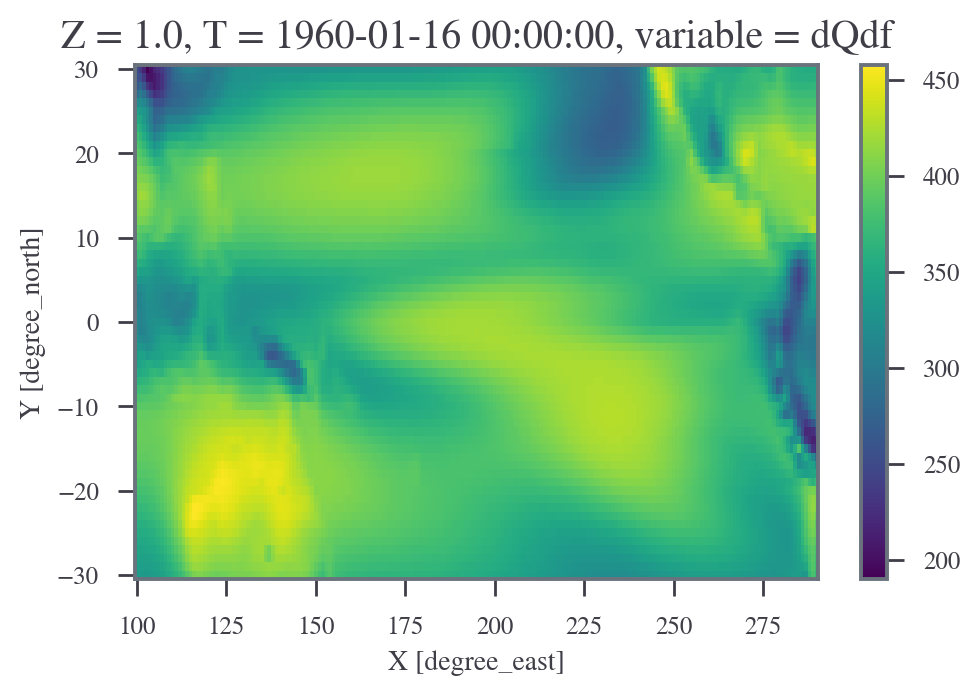

In [35]:
sel(open_dataarray(os.path.join(setup.ocean_data_path, "dQdf-sample.nc")).isel(T=0)).plot()

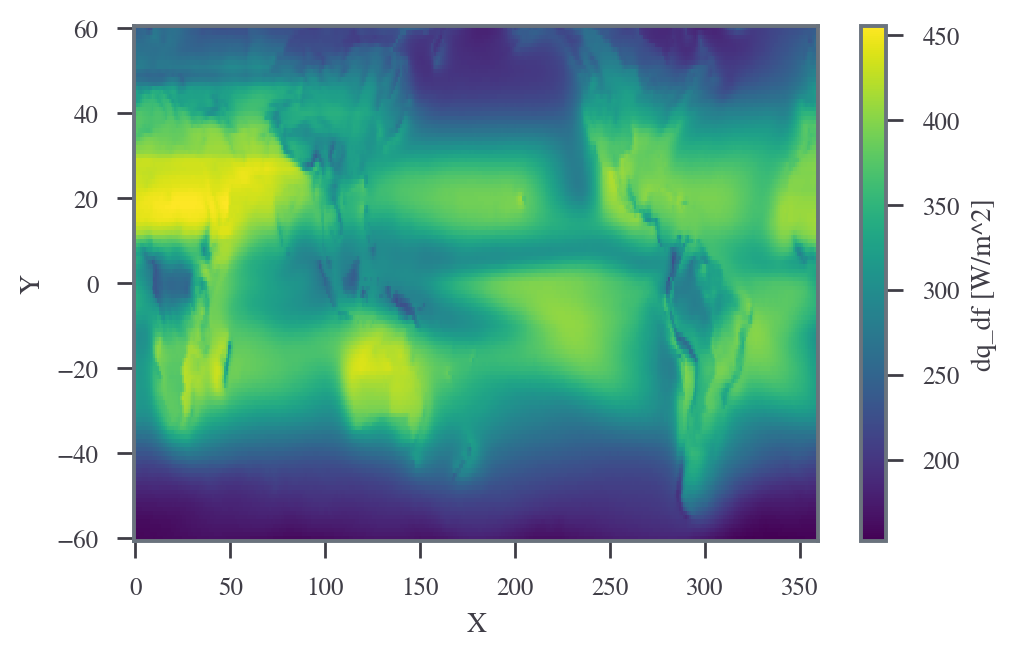

In [48]:
can_coords(open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))).dq_df.plot()

In [39]:
xr.open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Data variables:
    dq_dt    (lat, lon) float32 ...
    dq_df    (lat, lon) float32 ...
    ALH      (lat, lon) float32 ...
    ALW      (lat, lon) float32 ...
    BLW      (lat, lon) float32 ...
    dTse     (lat, lon) float32 ...
    rh       (lat, lon) float32 ...
    Ub       (lat, lon) float32 ...
    Cb       (lat, lon) float32 ...
    Tsb      (lat, lon) float32 ...

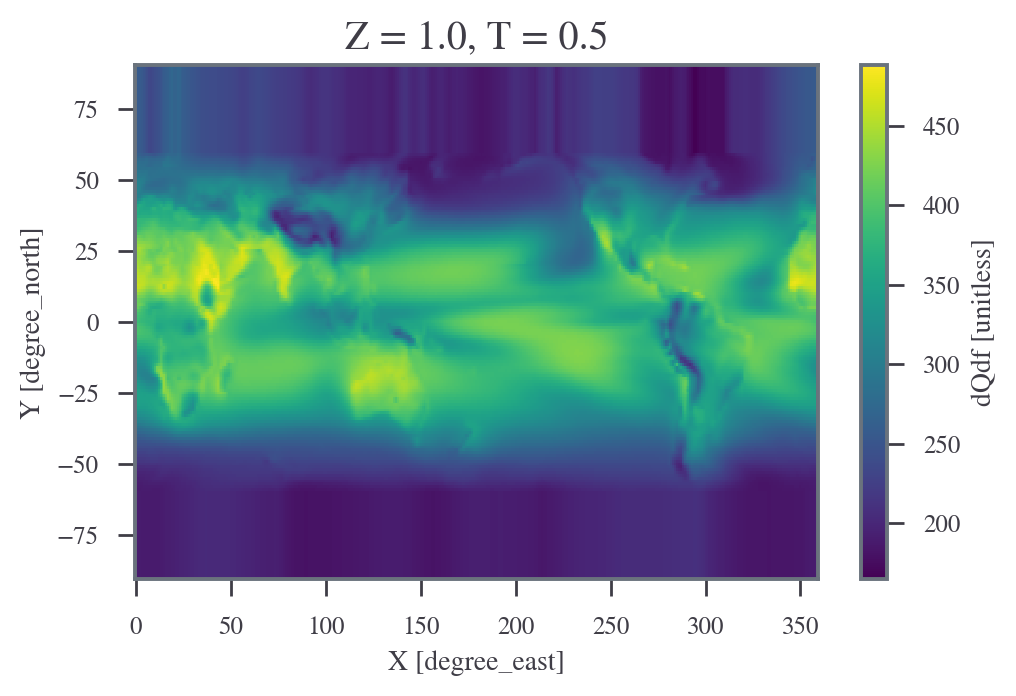

In [51]:
xr.open_dataarray(os.path.join(setup.ocean_data_path, "dQdf-sample.nc"), decode_times=False).isel(T=0).plot()

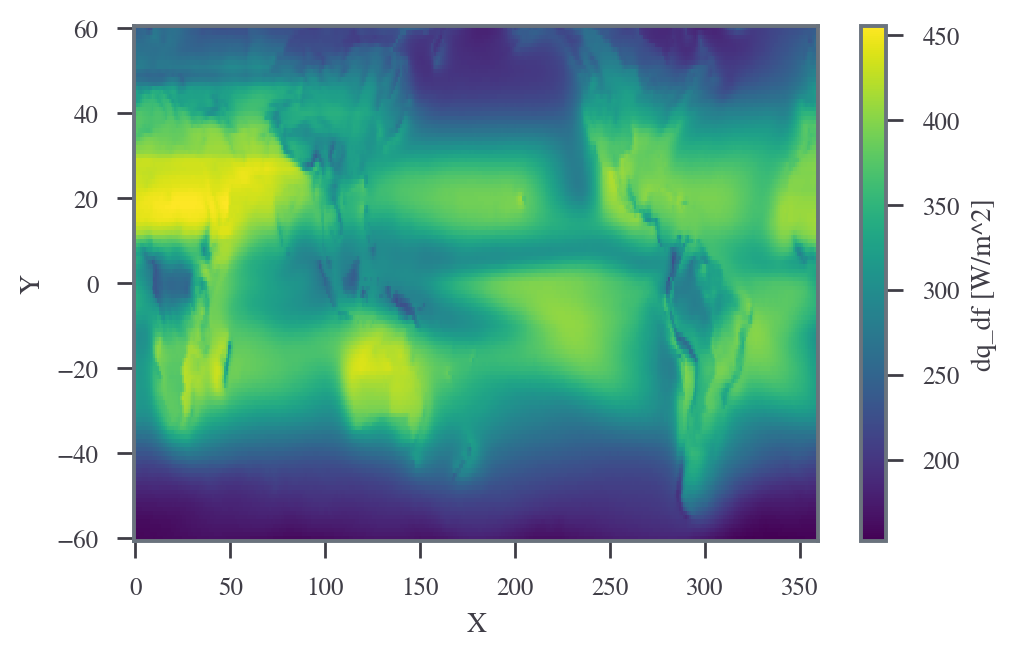

In [52]:
can_coords(open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))).dq_df.plot()

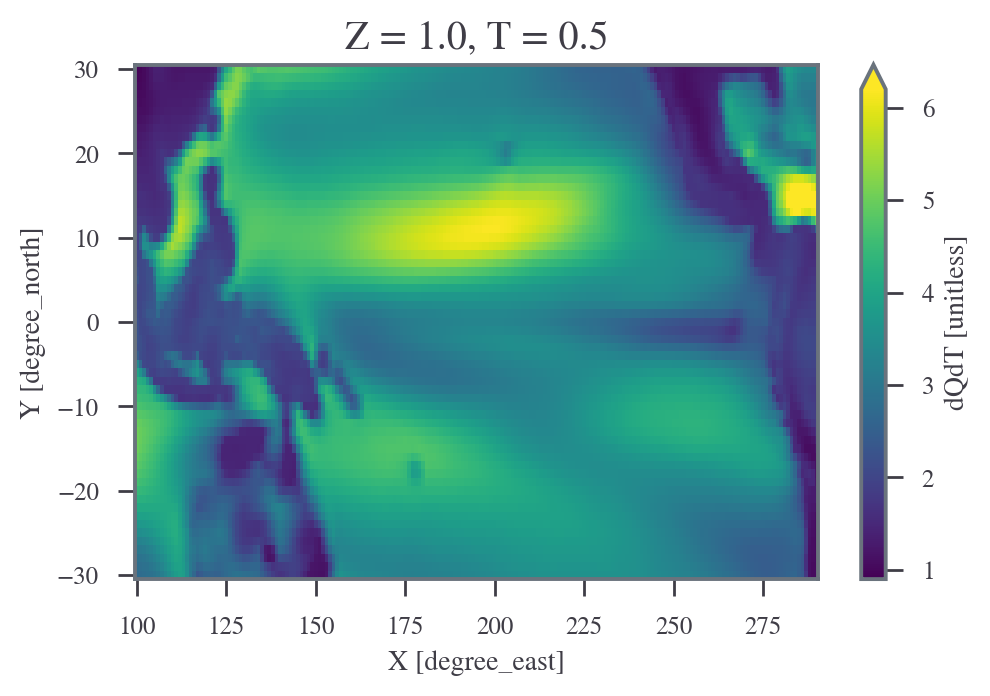

In [60]:
sel(xr.open_dataarray(
    os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
)).isel(T=0, Z=0).plot(vmin=0.9, vmax=6.2)

In [65]:
add_coords(sel(can_coords(open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))).dq_dt)).plot(
    vmin=0.9, vmax=6.2
)

NameError: name 'add_coords' is not defined